**This is a Strom tracks data. This shape file consists of consolidated history of tropical storm paths over the past 50 years in the West Pacific, South Pacific, South Indian and North Indian basin. Attributes provides details such as storm Name, Date, Time, wind speed and GPS points for each advisory point.**

**Data set : https://data.world/ocha-roap/b1068a22-ec52-459d-9541-0fb63906bb39**

# Import Package

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from simpledbf import Dbf5
import seaborn as sns
import numpy as np

%matplotlib inline

# Import Data

In [2]:
# import dbf data
dbf = Dbf5("Data Sets/UNISYS_tracks_1956_2018Dec31.dbf") 

# Convert into Data frame
data = dbf.to_dataframe() 

In [3]:
# First 5 data in the data set
data.head(10) 

,REGION,STORM_NO,NAME,ADVISORY,ADV_DATE,ADV_HOUR,SPEED,PRESSURE,TYPE,LAT,LONG_
0,S,0,1997-12-02,0,1997-12-03,18,25,0,D,-8.6,0.0
1,I,0,1979-02-11,0,1979-02-11,12,-999,0,D,-16.4,0.0
2,A,6,FIFI,0,1958-09-06,6,65,0,S,15.6,-55.7
3,A,6,FRANCES,0,2004-09-02,0,120,939,H,22.2,-71.4
4,A,3,UNNAMED,0,1948-09-03,0,40,0,S,53.8,-50.0
5,A,9,HELENE,0,1988-09-27,18,77,979,H,30.9,-51.9
6,I,0,1966-01-02,0,1966-01-04,12,-999,0,D,-13.7,0.0
7,A,3,CINDY,0,2005-07-09,6,25,1009,D,40.8,-70.7
8,I,0,1992-04-04,0,1992-04-06,18,40,0,S,-10.3,0.0
9,S,0,1963-01-29,0,1963-01-30,18,-999,0,D,-20.1,0.0


In [4]:
# Shape of data
data.shape

(227574, 11)

In [5]:
# Check Missing data and data types of all collumn 
def check_missing_data(data):
    # Check how many data is missing in every collumn
    total = data.isnull().sum()
    
    # percentage of missing data of every collumn
    percent = total/data.isnull().count() * 100
    
    # Create a table
    table = pd.concat([total,percent],axis=1,keys=['Total','Percent'])
    
    # Check data type of every column  and fit it in the table
    types = []
    for col in data.columns:
        dtype = str(data[col].dtype)
        types.append(dtype)
        
    table["Types"] = types
    
    #  Transpose the table
    table = np.transpose(table)
        
    return table

In [6]:
# Check missing data
check_missing_data(data)

,REGION,STORM_NO,NAME,ADVISORY,ADV_DATE,ADV_HOUR,SPEED,PRESSURE,TYPE,LAT,LONG_
Total,0,0,0,0,68,0,0,0,11,0,0
Percent,0,0,0,0,0.0298804,0,0,0,0.00483359,0,0
Types,object,int64,object,int64,object,int64,int64,int64,object,float64,float64


In [7]:
# Information of data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227574 entries, 0 to 227573
Data columns (total 11 columns):
REGION      227574 non-null object
STORM_NO    227574 non-null int64
NAME        227574 non-null object
ADVISORY    227574 non-null int64
ADV_DATE    227506 non-null object
ADV_HOUR    227574 non-null int64
SPEED       227574 non-null int64
PRESSURE    227574 non-null int64
TYPE        227563 non-null object
LAT         227574 non-null float64
LONG_       227574 non-null float64
dtypes: float64(2), int64(5), object(4)
memory usage: 19.1+ MB


# Data cleaning

**Here missing value is very less. So we just remove those missing value rows**

In [8]:
# remove null and create a new data set name cleaned_data
cleaned_data = data.dropna()

In [9]:
# Look up the first five data
cleaned_data.head()

,REGION,STORM_NO,NAME,ADVISORY,ADV_DATE,ADV_HOUR,SPEED,PRESSURE,TYPE,LAT,LONG_
0,S,0,1997-12-02,0,1997-12-03,18,25,0,D,-8.6,0.0
1,I,0,1979-02-11,0,1979-02-11,12,-999,0,D,-16.4,0.0
2,A,6,FIFI,0,1958-09-06,6,65,0,S,15.6,-55.7
3,A,6,FRANCES,0,2004-09-02,0,120,939,H,22.2,-71.4
4,A,3,UNNAMED,0,1948-09-03,0,40,0,S,53.8,-50.0


In [10]:
# Shape of cleaned_data
cleaned_data.shape

(227495, 11)

**Check any null value left or not ?**

In [11]:
cleaned_data.isnull().sum()

REGION      0
STORM_NO    0
NAME        0
ADVISORY    0
ADV_DATE    0
ADV_HOUR    0
SPEED       0
PRESSURE    0
TYPE        0
LAT         0
LONG_       0
dtype: int64

Data has been cleaned

# Feature Exploration

**In data set ADV_DATE column data type is object. Lets take this into Timestamp. That will help us for analysis**

In [12]:
# Convert ADV_DATE column object to date time
cleaned_data["ADV_DATE"] = pd.to_datetime(cleaned_data["ADV_DATE"])

C:\Users\N M Shihab Islam\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [13]:
# check the data type
str(cleaned_data["ADV_DATE"].dtype)

'datetime64[ns]'

**Create new column**

In [14]:
cleaned_data["Year"] = cleaned_data["ADV_DATE"].apply(lambda y:y.year)
cleaned_data["Month"] = cleaned_data["ADV_DATE"].apply(lambda m:m.month)

C:\Users\N M Shihab Islam\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\N M Shihab Islam\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [15]:
# Look up data again
cleaned_data.head()

,REGION,STORM_NO,NAME,ADVISORY,ADV_DATE,ADV_HOUR,SPEED,PRESSURE,TYPE,LAT,LONG_,Year,Month
0,S,0,1997-12-02,0,1997-12-03,18,25,0,D,-8.6,0.0,1997,12
1,I,0,1979-02-11,0,1979-02-11,12,-999,0,D,-16.4,0.0,1979,2
2,A,6,FIFI,0,1958-09-06,6,65,0,S,15.6,-55.7,1958,9
3,A,6,FRANCES,0,2004-09-02,0,120,939,H,22.2,-71.4,2004,9
4,A,3,UNNAMED,0,1948-09-03,0,40,0,S,53.8,-50.0,1948,9


In [16]:
# unoique month when the strom occured
cleaned_data["Month"].unique()

array([12,  2,  9,  1,  7,  4,  8, 10,  6,  3, 11,  5], dtype=int64)

In [17]:
# Map Month into name
dmap = {1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'Jun',7:'Jul',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'}

In [18]:
# Appy dmap on month column
cleaned_data["Month"] = cleaned_data["Month"].map(dmap)

C:\Users\N M Shihab Islam\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [19]:
# Look up data again
cleaned_data.head()

,REGION,STORM_NO,NAME,ADVISORY,ADV_DATE,ADV_HOUR,SPEED,PRESSURE,TYPE,LAT,LONG_,Year,Month
0,S,0,1997-12-02,0,1997-12-03,18,25,0,D,-8.6,0.0,1997,Dec
1,I,0,1979-02-11,0,1979-02-11,12,-999,0,D,-16.4,0.0,1979,Feb
2,A,6,FIFI,0,1958-09-06,6,65,0,S,15.6,-55.7,1958,Sep
3,A,6,FRANCES,0,2004-09-02,0,120,939,H,22.2,-71.4,2004,Sep
4,A,3,UNNAMED,0,1948-09-03,0,40,0,S,53.8,-50.0,1948,Sep


# EDA

**What are the unique region?**

In [20]:
cleaned_data["REGION"].unique()

array(['S', 'I', 'A', 'W', 'E'], dtype=object)

**which region got more stroms? and visualize it ?**

In [21]:
cleaned_data["REGION"].value_counts()

A    97262
W    52100
I    38434
E    21955
S    17744
Name: REGION, dtype: int64

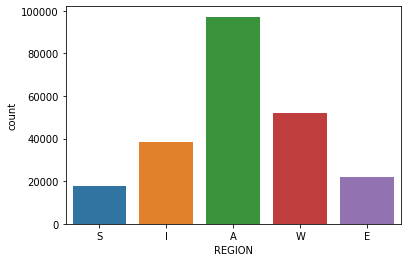

In [22]:
#Visualization
sns.countplot(x="REGION",data=cleaned_data)

**We observe that : Region A got the more stroms among them then W then  I then S**

**According to the graph... Region A got the most stroms**

In [23]:
cleaned_data["Month"].value_counts()

Sep    56899
Aug    39042
Oct    31211
Jul    18337
Nov    14795
Jan    12489
Feb    11256
Dec    10703
Mar    10443
Jun    10030
Apr     6356
May     5934
Name: Month, dtype: int64

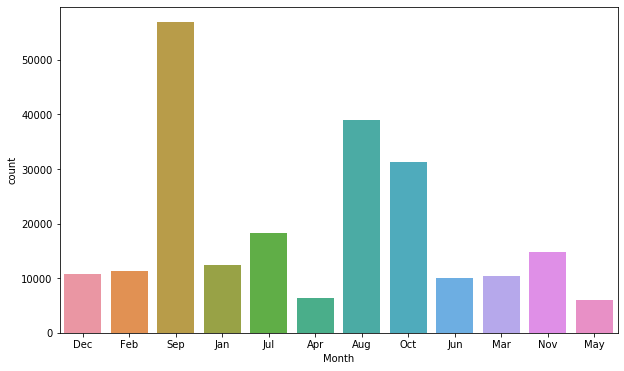

In [24]:
plt.figure(figsize=(10,6))
sns.countplot(x="Month",data=cleaned_data)

**According to this visualization September got the most stroms and May got the least stroms**

____

**Can we analysis which months are crusial for which region?**

In [25]:
by_month_region = cleaned_data.groupby(["Month","REGION"])["NAME"].count()

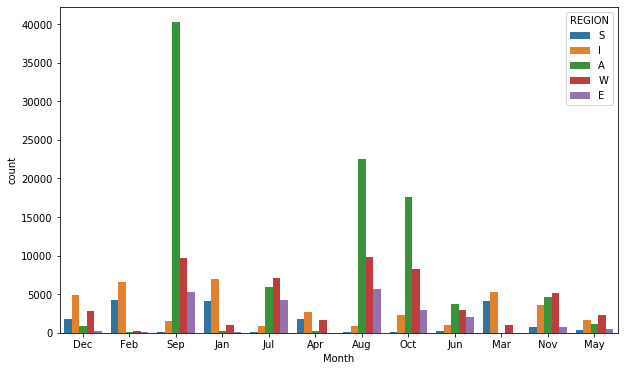

In [26]:
#Lets visualize
plt.figure(figsize=(10,6))
sns.countplot(x="Month",data=cleaned_data,hue="REGION")

In [27]:
cleaned_data.columns

Index(['REGION', 'STORM_NO', 'NAME', 'ADVISORY', 'ADV_DATE', 'ADV_HOUR',
       'SPEED', 'PRESSURE', 'TYPE', 'LAT', 'LONG_', 'Year', 'Month'],
      dtype='object')

**Geographical plot of the data sets**

In [35]:
# Import necessary package

from shapely.geometry import Point
import geopandas as gpd

In [60]:
# This function will create a geographycal plot
def geo_plot(data):   
    geometry = [Point(xy) for xy in zip(data['LONG_'],data['LAT'])]
    gdf = gpd.GeoDataFrame(data, geometry=geometry)   

    #this is a simple map that goes with geopandas
    world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
    gdf.plot(ax=world.plot(figsize=(50, 50)), marker='o', color='red', markersize=10);

**Try to plot regionwise**

In [30]:
cleaned_data.REGION.unique()

array(['S', 'I', 'A', 'W', 'E'], dtype=object)

In [31]:
S_region = cleaned_data[cleaned_data["REGION"]=="S"]
I_region = cleaned_data[cleaned_data["REGION"]=="I"]
A_region = cleaned_data[cleaned_data["REGION"]=="A"]
W_region = cleaned_data[cleaned_data["REGION"]=="W"]
E_region = cleaned_data[cleaned_data["REGION"]=="E"]

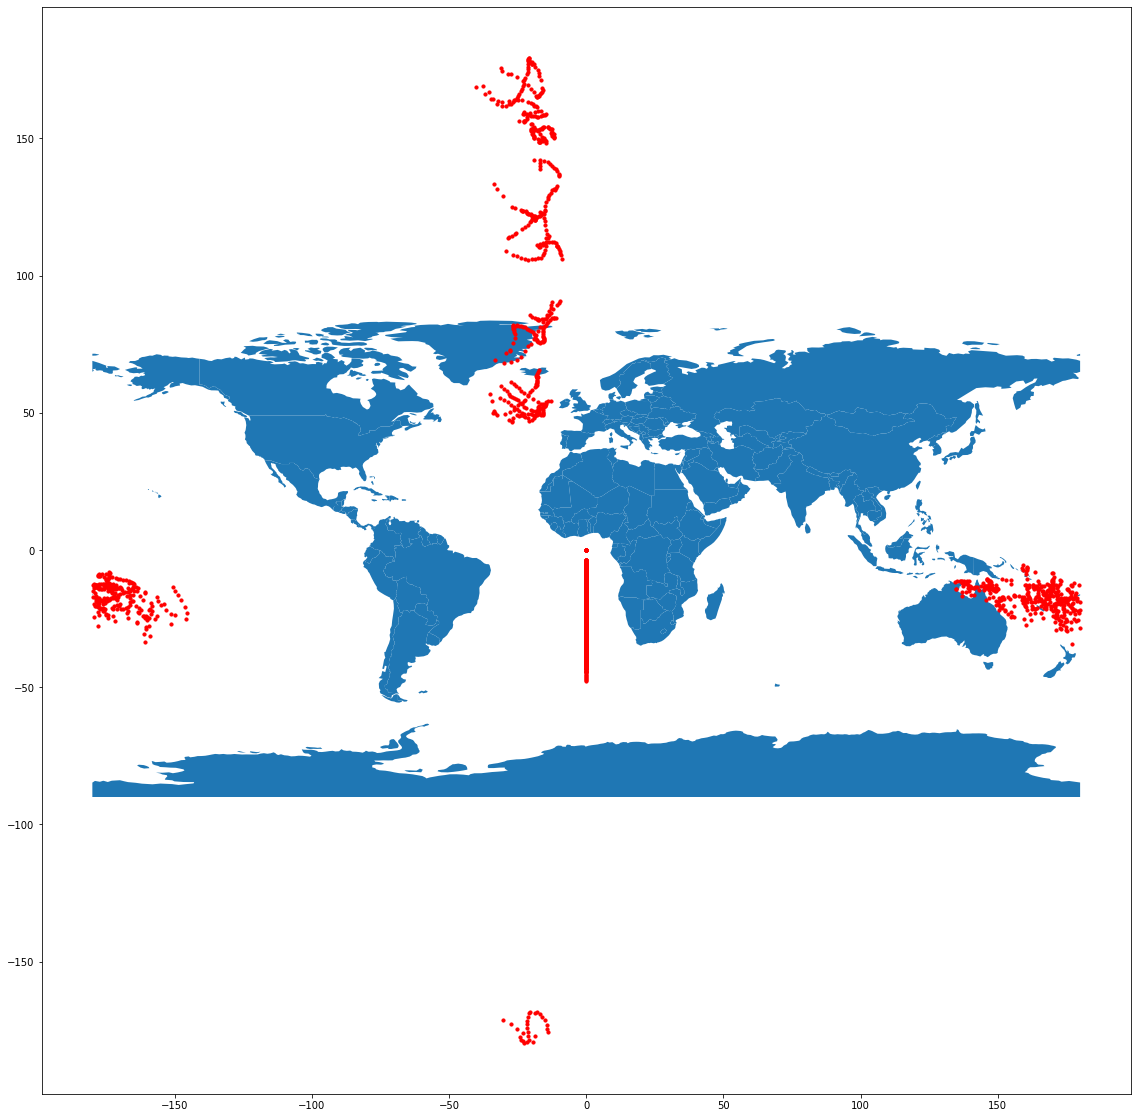

In [54]:
# S region plot
geo_plot(S_region)

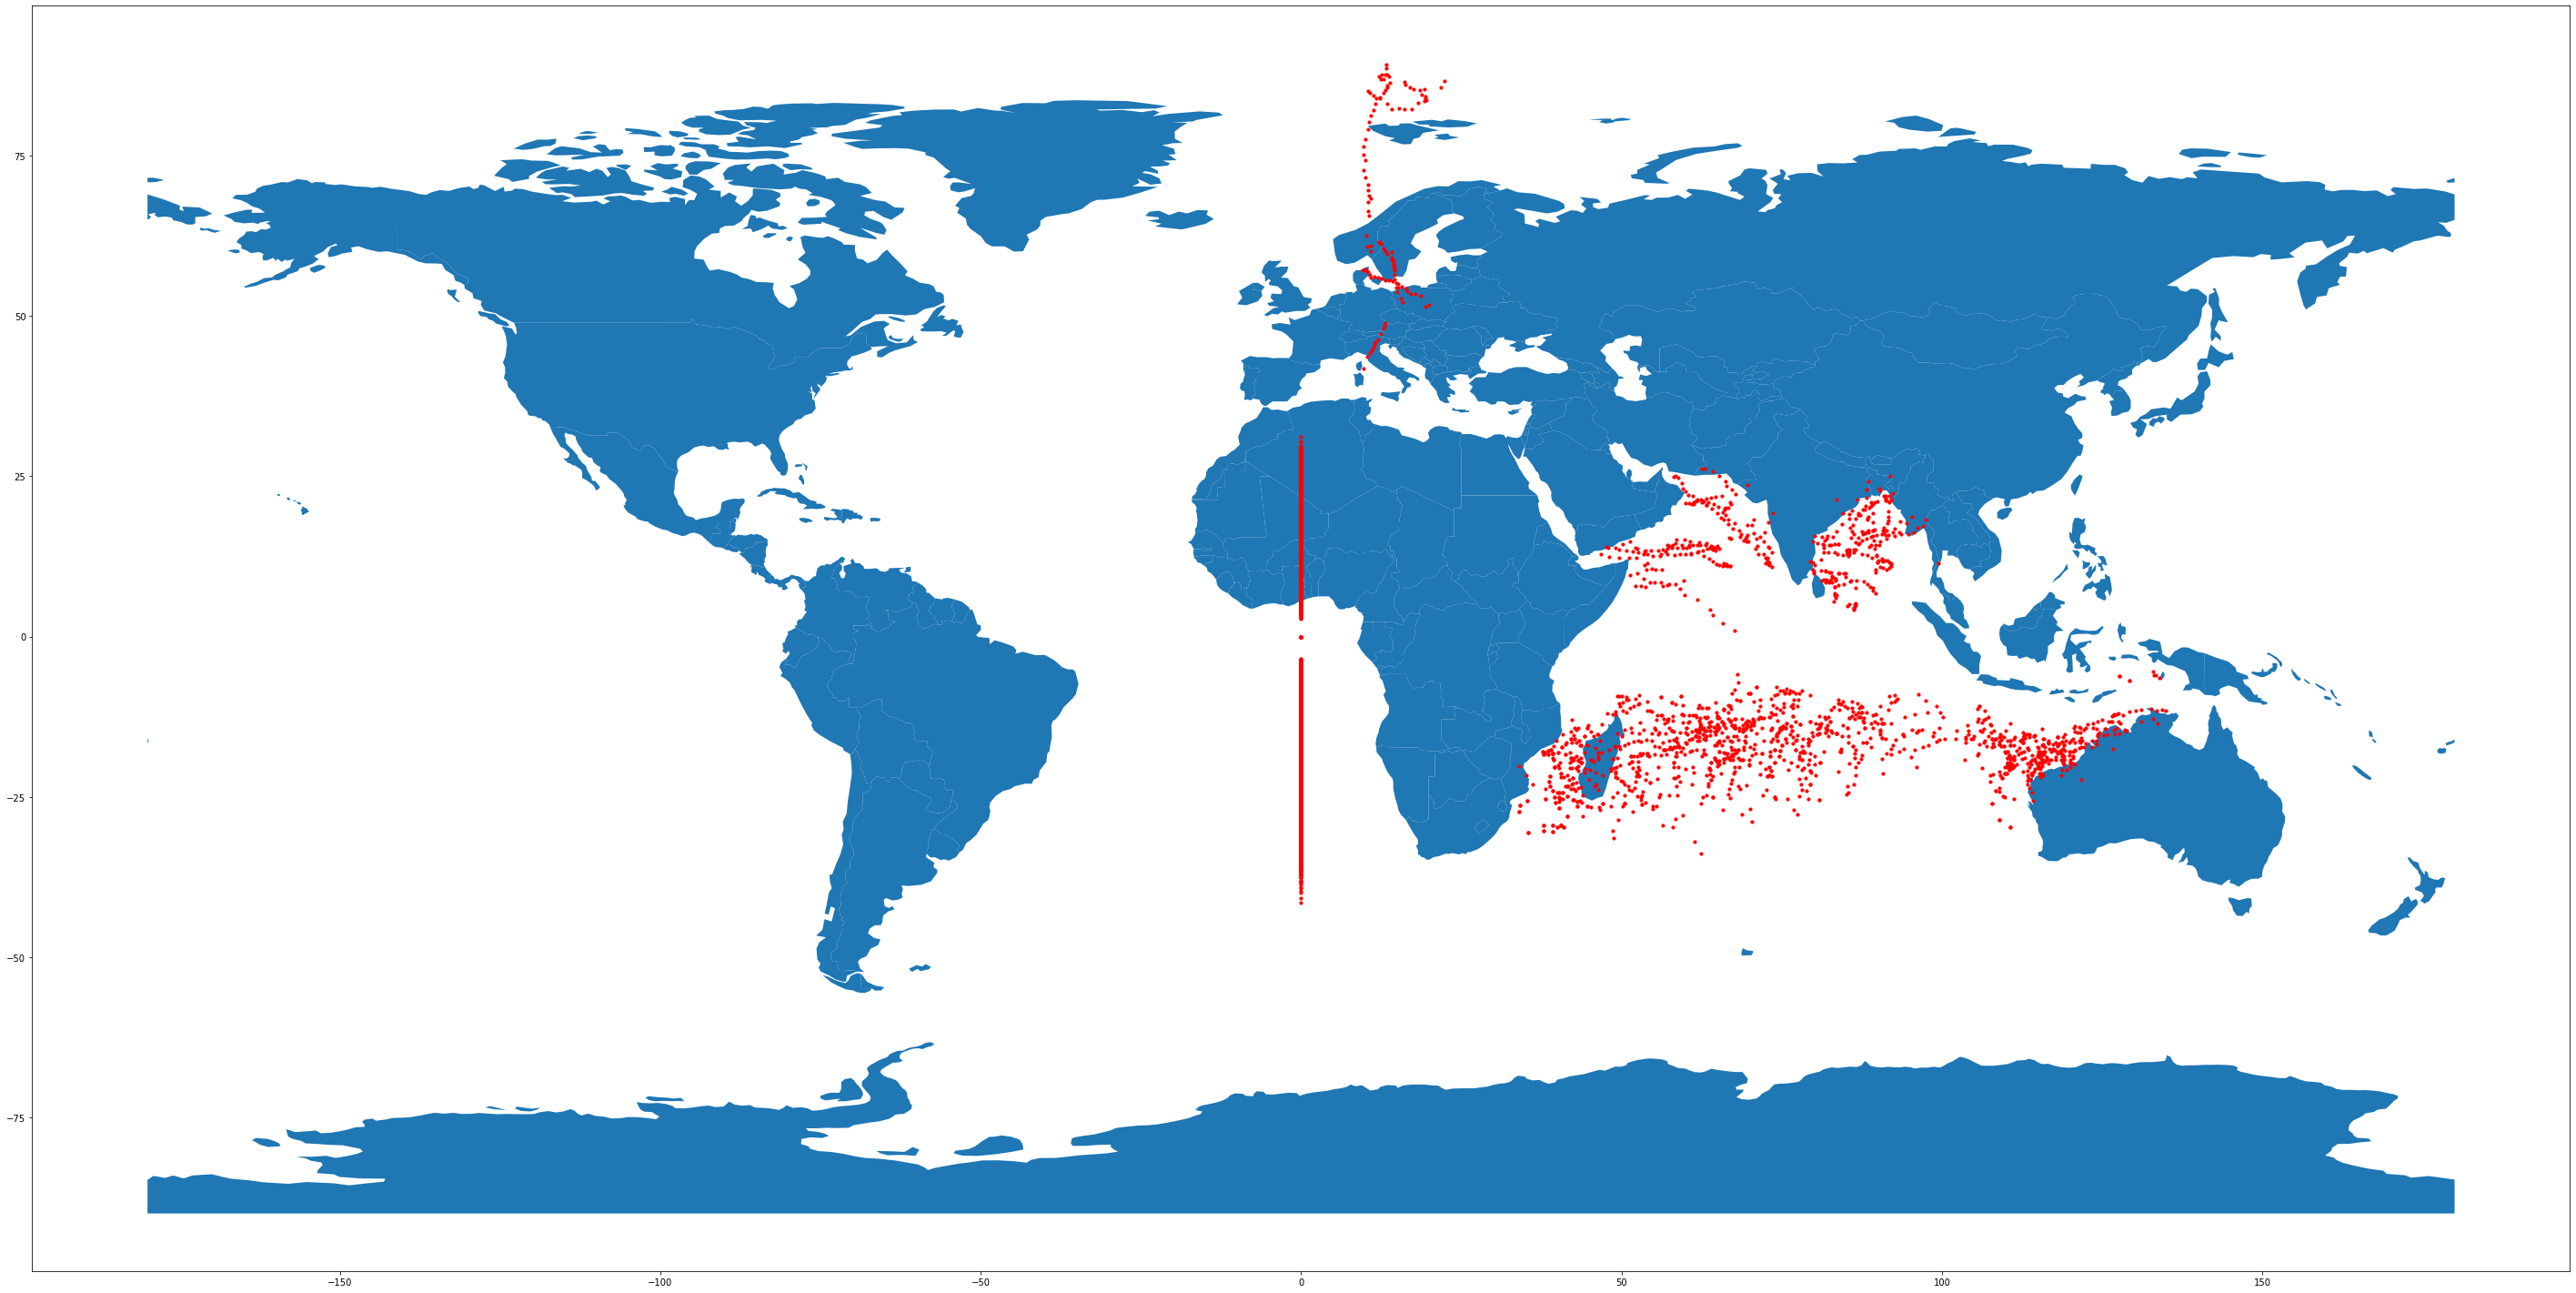

In [61]:
# I Region plot
geo_plot(I_region)

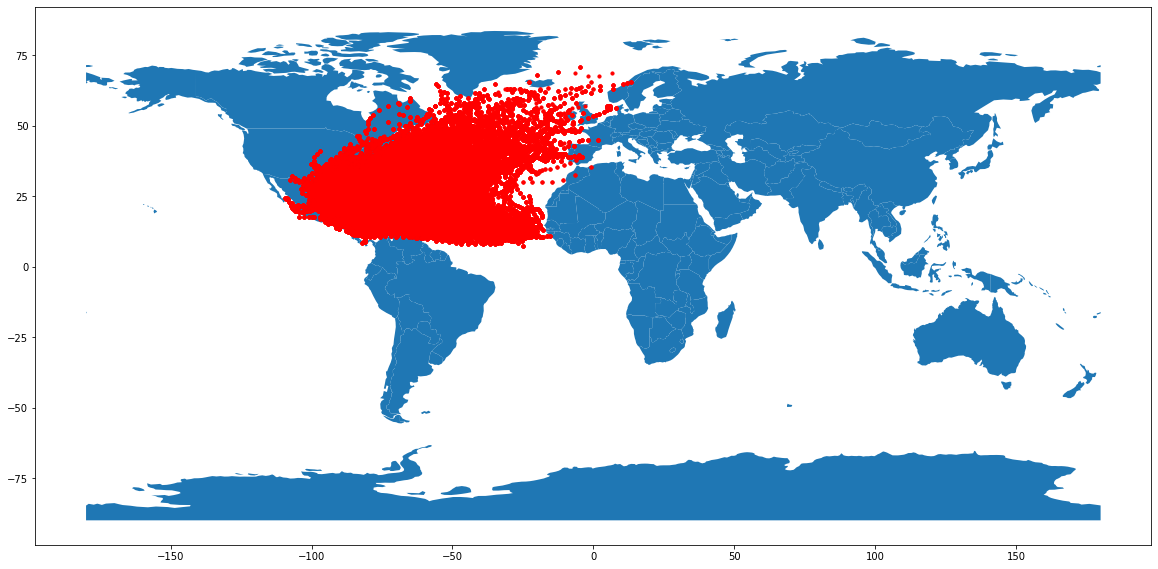

In [56]:
# A Region plot
geo_plot(A_region)

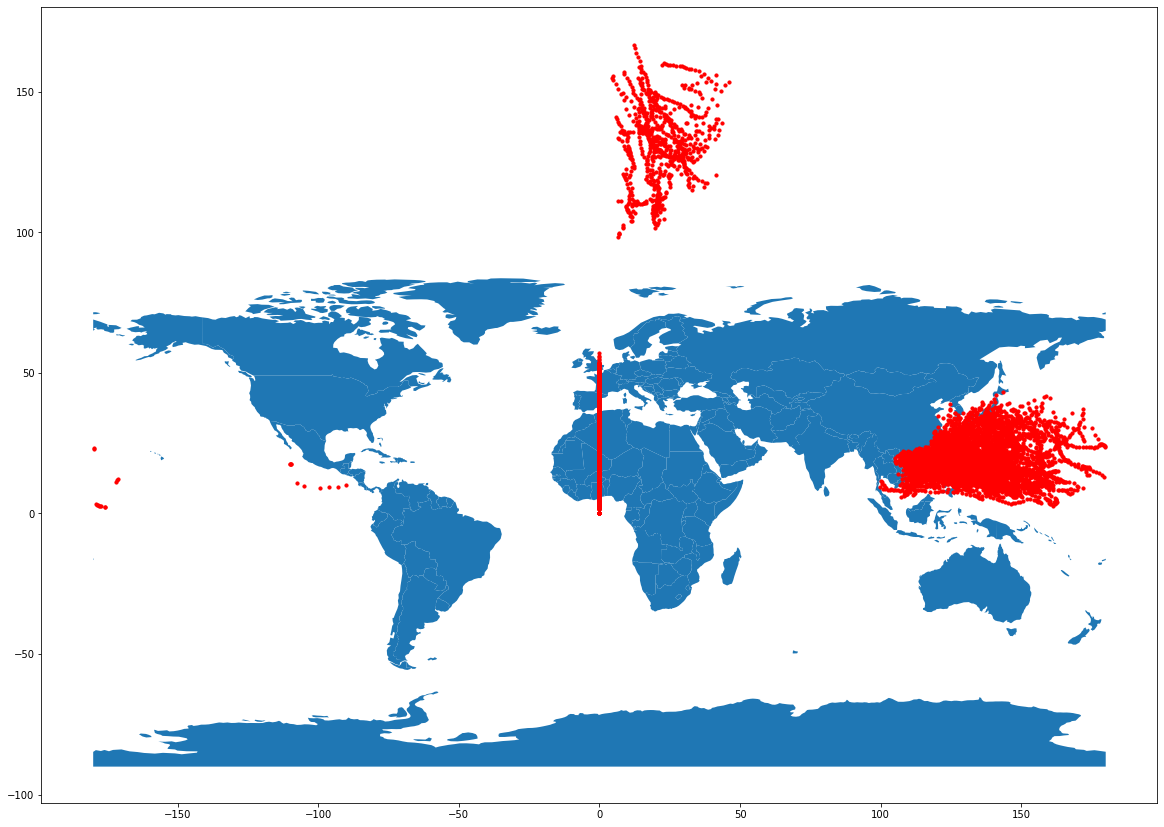

In [57]:
# W region plot
geo_plot(W_region)

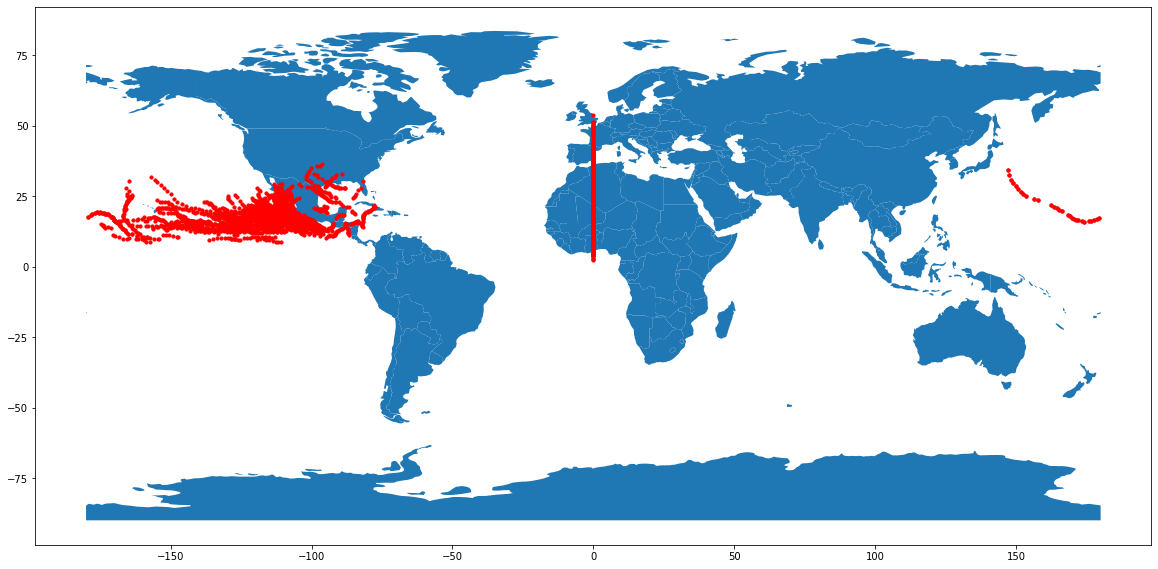

In [58]:
# E Region plot
geo_plot(E_region)

**Whole data set geographycal plot**

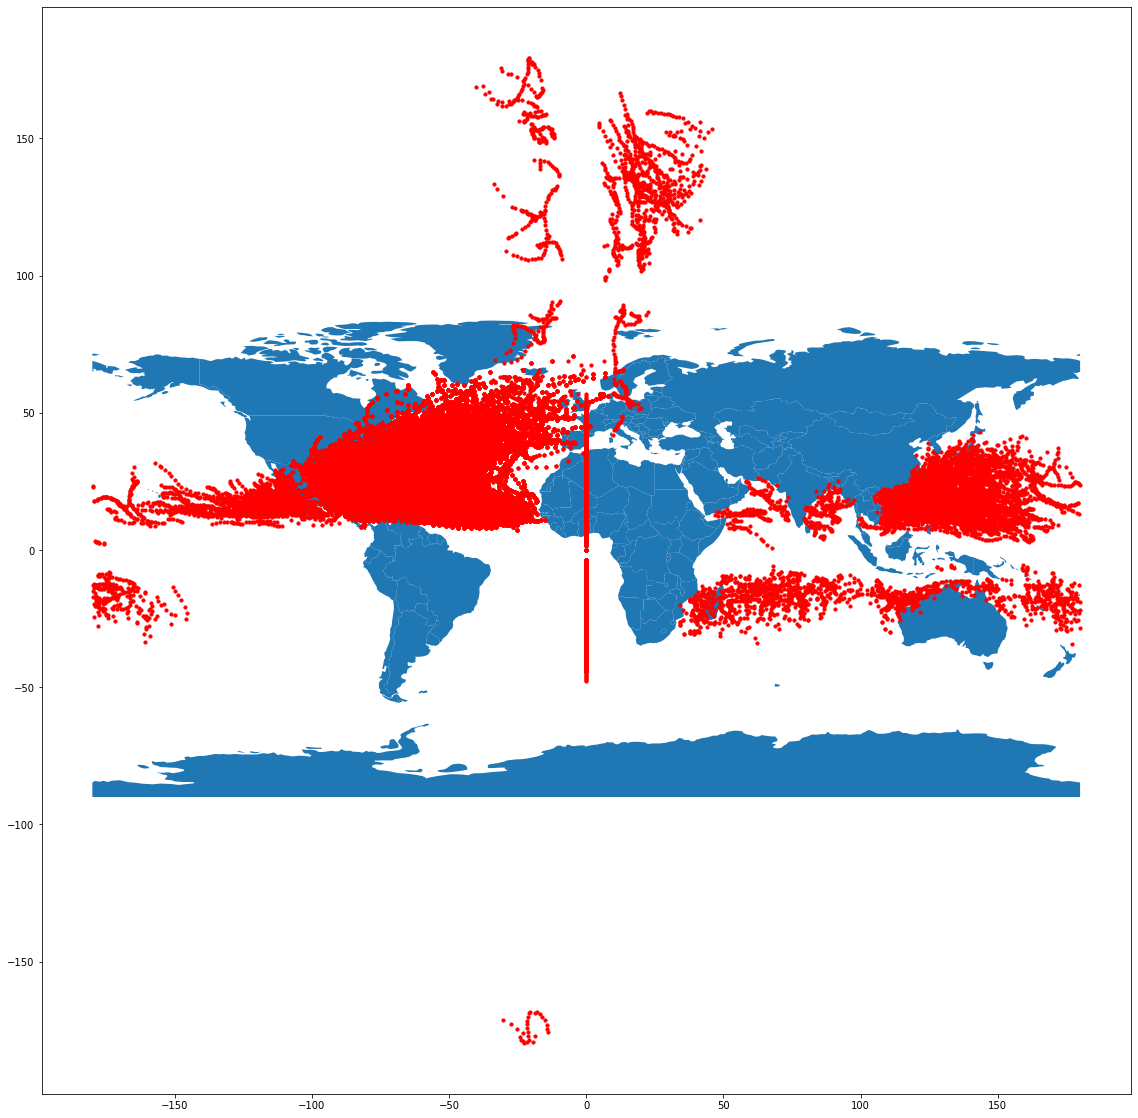

In [59]:
geo_plot(cleaned_data)